# 아마존 알렉사 리뷰

## 1) 리뷰 데이터 불러오기

### pandas 라이브러리 사용, 데이터 출처: https://www.kaggle.com/sid321axn/amazon-alexa-reviews

In [1]:
import pandas as pd

In [2]:
review_data = pd.read_csv('amazon_alexa.tsv', delimiter='\t', encoding='utf-8')

In [3]:
review_data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [4]:
review_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## 2) 기초 데이터 시각화

### 2.1) Amazon Alexa에 대한 전반적인 평점

In [5]:
import matplotlib.pyplot as plt

In [6]:
num_rating5 = review_data['rating'][review_data['rating']==5].count()
num_rating4 = review_data['rating'][review_data['rating']==4].count()
num_rating3 = review_data['rating'][review_data['rating']==3].count()
num_rating2 = review_data['rating'][review_data['rating']==2].count()
num_rating1 = review_data['rating'][review_data['rating']==1].count()

In [7]:
x = ['5','4','3','2','1']

In [8]:
ratio_rating = [num_rating5 / len(review_data['rating']), num_rating4 / len(review_data['rating']), num_rating3 / len(review_data['rating']), 
                num_rating2 / len(review_data['rating']), num_rating1 / len(review_data['rating'])]

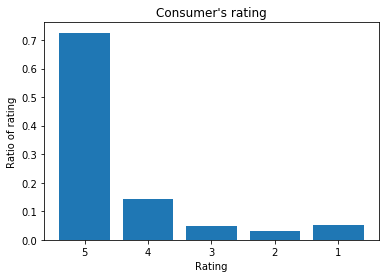

In [9]:
plt.bar(x, ratio_rating)
plt.title("Consumer's rating")
plt.xlabel("Rating")
plt.ylabel("Ratio of rating")
plt.show()

### 2.2) 품목별 피드백, 평점

In [10]:
var_rate = pd.pivot_table(review_data, index = ['variation'])
var_rate.head()

,feedback,rating
variation,,
Black,0.865900,4.233716
Black Dot,0.930233,4.453488
Black Plus,0.896296,4.370370
Black Show,0.932075,4.490566
Black Spot,0.867220,4.311203


#### 피드백, 평점이 최대인 품목

In [11]:
var_rate['feedback'].idxmax(), var_rate['rating'].idxmax()

('Oak Finish ', 'Walnut Finish ')

## 3) Google Cloud Platform을 이용한 sentimental analysis

### Natural Language API Client 사용

In [12]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [13]:
path = 'C:\\Users\jhpark\Documents\GitHub\Private-NLP\Taejun-1fa51108e2e7.json'  # FULL path to your service account key
client = language.LanguageServiceClient.from_service_account_json(path)

In [14]:
senti_score = list()
senti_mag = list()

In [15]:
for i in range(len(review_data['verified_reviews'])):
    text = review_data['verified_reviews'][i]
    document = types.Document(
        content = text,
        type    = enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    senti_score.append(sentiment.score)
    senti_mag.append(sentiment.magnitude)
    print('{} is completed'.format(i))

0 is completed
1 is completed
2 is completed
3 is completed
4 is completed
5 is completed
6 is completed
7 is completed
8 is completed
9 is completed
10 is completed
11 is completed
12 is completed
13 is completed
14 is completed
15 is completed
16 is completed
17 is completed
18 is completed
19 is completed
20 is completed
21 is completed
22 is completed
23 is completed
24 is completed
25 is completed
26 is completed
27 is completed
28 is completed
29 is completed
30 is completed
31 is completed
32 is completed
33 is completed
34 is completed
35 is completed
36 is completed
37 is completed
38 is completed
39 is completed
40 is completed
41 is completed
42 is completed
43 is completed
44 is completed
45 is completed
46 is completed
47 is completed
48 is completed
49 is completed
50 is completed
51 is completed
52 is completed
53 is completed
54 is completed
55 is completed
56 is completed
57 is completed
58 is completed
59 is completed
60 is completed
61 is completed
62 is completed
63

489 is completed
490 is completed
491 is completed
492 is completed
493 is completed
494 is completed
495 is completed
496 is completed
497 is completed
498 is completed
499 is completed
500 is completed
501 is completed
502 is completed
503 is completed
504 is completed
505 is completed
506 is completed
507 is completed
508 is completed
509 is completed
510 is completed
511 is completed
512 is completed
513 is completed
514 is completed
515 is completed
516 is completed
517 is completed
518 is completed
519 is completed
520 is completed
521 is completed
522 is completed
523 is completed
524 is completed
525 is completed
526 is completed
527 is completed
528 is completed
529 is completed
530 is completed
531 is completed
532 is completed
533 is completed
534 is completed
535 is completed
536 is completed
537 is completed
538 is completed
539 is completed
540 is completed
541 is completed
542 is completed
543 is completed
544 is completed
545 is completed
546 is completed
547 is complet

971 is completed
972 is completed
973 is completed
974 is completed
975 is completed
976 is completed
977 is completed
978 is completed
979 is completed
980 is completed
981 is completed
982 is completed
983 is completed
984 is completed
985 is completed
986 is completed
987 is completed
988 is completed
989 is completed
990 is completed
991 is completed
992 is completed
993 is completed
994 is completed
995 is completed
996 is completed
997 is completed
998 is completed
999 is completed
1000 is completed
1001 is completed
1002 is completed
1003 is completed
1004 is completed
1005 is completed
1006 is completed
1007 is completed
1008 is completed
1009 is completed
1010 is completed
1011 is completed
1012 is completed
1013 is completed
1014 is completed
1015 is completed
1016 is completed
1017 is completed
1018 is completed
1019 is completed
1020 is completed
1021 is completed
1022 is completed
1023 is completed
1024 is completed
1025 is completed
1026 is completed
1027 is completed
102

1428 is completed
1429 is completed
1430 is completed
1431 is completed
1432 is completed
1433 is completed
1434 is completed
1435 is completed
1436 is completed
1437 is completed
1438 is completed
1439 is completed
1440 is completed
1441 is completed
1442 is completed
1443 is completed
1444 is completed
1445 is completed
1446 is completed
1447 is completed
1448 is completed
1449 is completed
1450 is completed
1451 is completed
1452 is completed
1453 is completed
1454 is completed
1455 is completed
1456 is completed
1457 is completed
1458 is completed
1459 is completed
1460 is completed
1461 is completed
1462 is completed
1463 is completed
1464 is completed
1465 is completed
1466 is completed
1467 is completed
1468 is completed
1469 is completed
1470 is completed
1471 is completed
1472 is completed
1473 is completed
1474 is completed
1475 is completed
1476 is completed
1477 is completed
1478 is completed
1479 is completed
1480 is completed
1481 is completed
1482 is completed
1483 is co

1884 is completed
1885 is completed
1886 is completed
1887 is completed
1888 is completed
1889 is completed
1890 is completed
1891 is completed
1892 is completed
1893 is completed
1894 is completed
1895 is completed
1896 is completed
1897 is completed
1898 is completed
1899 is completed
1900 is completed
1901 is completed
1902 is completed
1903 is completed
1904 is completed
1905 is completed
1906 is completed
1907 is completed
1908 is completed
1909 is completed
1910 is completed
1911 is completed
1912 is completed
1913 is completed
1914 is completed
1915 is completed
1916 is completed
1917 is completed
1918 is completed
1919 is completed
1920 is completed
1921 is completed
1922 is completed
1923 is completed
1924 is completed
1925 is completed
1926 is completed
1927 is completed
1928 is completed
1929 is completed
1930 is completed
1931 is completed
1932 is completed
1933 is completed
1934 is completed
1935 is completed
1936 is completed
1937 is completed
1938 is completed
1939 is co

2340 is completed
2341 is completed
2342 is completed
2343 is completed
2344 is completed
2345 is completed
2346 is completed
2347 is completed
2348 is completed
2349 is completed
2350 is completed
2351 is completed
2352 is completed
2353 is completed
2354 is completed
2355 is completed
2356 is completed
2357 is completed
2358 is completed
2359 is completed
2360 is completed
2361 is completed
2362 is completed
2363 is completed
2364 is completed
2365 is completed
2366 is completed
2367 is completed
2368 is completed
2369 is completed
2370 is completed
2371 is completed
2372 is completed
2373 is completed
2374 is completed
2375 is completed
2376 is completed
2377 is completed
2378 is completed
2379 is completed
2380 is completed
2381 is completed
2382 is completed
2383 is completed
2384 is completed
2385 is completed
2386 is completed
2387 is completed
2388 is completed
2389 is completed
2390 is completed
2391 is completed
2392 is completed
2393 is completed
2394 is completed
2395 is co

2796 is completed
2797 is completed
2798 is completed
2799 is completed
2800 is completed
2801 is completed
2802 is completed
2803 is completed
2804 is completed
2805 is completed
2806 is completed
2807 is completed
2808 is completed
2809 is completed
2810 is completed
2811 is completed
2812 is completed
2813 is completed
2814 is completed
2815 is completed
2816 is completed
2817 is completed
2818 is completed
2819 is completed
2820 is completed
2821 is completed
2822 is completed
2823 is completed
2824 is completed
2825 is completed
2826 is completed
2827 is completed
2828 is completed
2829 is completed
2830 is completed
2831 is completed
2832 is completed
2833 is completed
2834 is completed
2835 is completed
2836 is completed
2837 is completed
2838 is completed
2839 is completed
2840 is completed
2841 is completed
2842 is completed
2843 is completed
2844 is completed
2845 is completed
2846 is completed
2847 is completed
2848 is completed
2849 is completed
2850 is completed
2851 is co

In [16]:
review_data['sentiment_score'] = senti_score

In [17]:
review_data['sentiment_magnitude'] = senti_mag

In [18]:
review_data.head()

,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment_magnitude
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.8,0.8
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.9,0.9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.1,1.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.7,2.3
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.1,0.1


In [19]:
review_data.to_csv('Amazon_review.csv')

In [20]:
review = pd.read_csv('Amazon_review.csv')

In [21]:
review

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment_magnitude
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.8,0.8
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.9,0.9
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.1,1.0
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.7,2.3
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,0.1,0.1
5,5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0.5,1.5
6,6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0.2,2.2
7,7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0.3,1.1
8,8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.7,0.7
9,9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0.7,2.8
